# Лабораторная работа 6

Временные ряда. Основы. Модель AR

Работу выполнила Зухир Амира Саидовна. ИВТ 1.2

## Импортируем все библиотеки и убираем предупреждения

In [11]:
%pip install pandas numpy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing, seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

## С помощью функции read_csv загружаем данные

In [13]:
df = pd.read_csv("./data/tovar_moving.csv", index_col=['date'], parse_dates=['date'], dayfirst=True)

## Составим сезонную декомпозицию

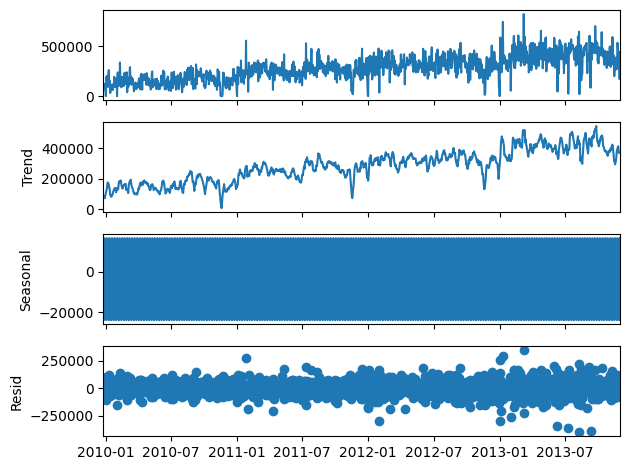

In [22]:
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()
plt.savefig('seasonal_dec.png')

## Разделение на обучающую и тестовую выборки. Экспоненциальное сглаживание

In [15]:
test_df = df.iloc[-1]
train_df = df.iloc[:-1]

alpha = 0.7
ses = SimpleExpSmoothing(train_df)
model = ses.fit(smoothing_level=alpha, optimized=False)
exp_pred = model.forecast(1)

## Сравнение последних значений

In [16]:
print(f'Реальное последнее значение: {round(test_df.values[0], 3)}')
print(f'Предсказанное последнее значение: {round(exp_pred.values[0], 3)}')

Реальное последнее значение: 423846.0
Предсказанное последнее значение: 225015.523


## Проверка на стационарность

In [17]:
test = sm.tsa.adfuller(train_df)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print ('Единичные корни. Ряд не стационарен')
else:
    print ('Нет единичных корней. Ряд стационарен')

adf:  -2.2553026410337997
p-value:  0.18678903123416468
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
Единичные корни. Ряд не стационарен


## Графики автокорреляции и частичной автокорреляции

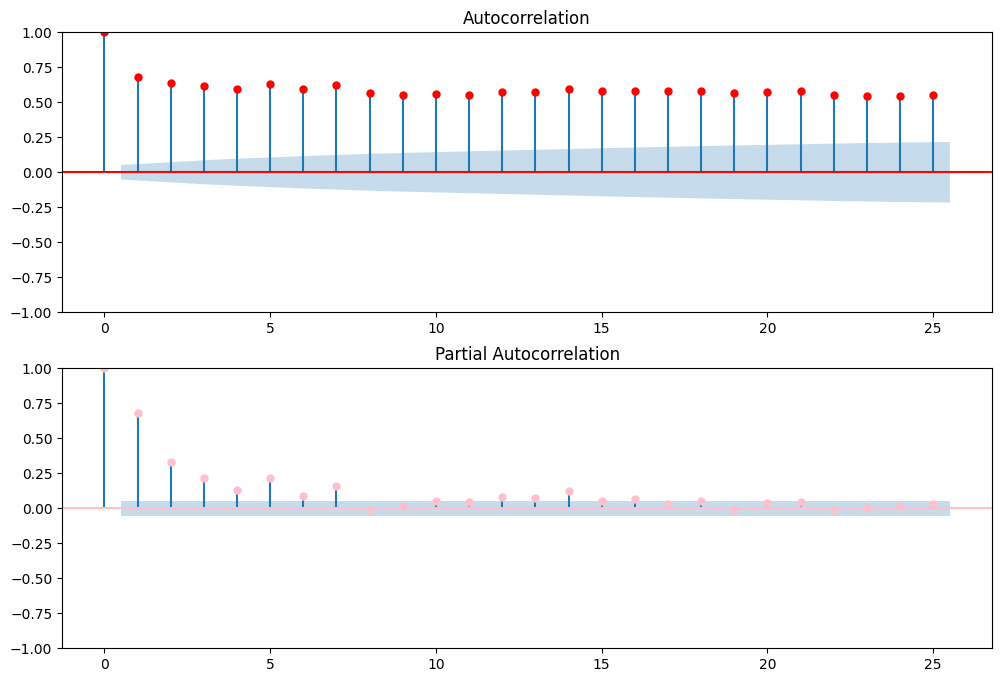

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(train_df.values.squeeze(), lags=25, ax=ax1, color='red')
sm.graphics.tsa.plot_pacf(train_df, lags=25, ax=ax2, color='pink') 
plt.savefig('autocorrelation.png') 

## Модель авторегрессии

In [19]:
ar_model = AutoReg(train_df, lags=2).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(2)   Log Likelihood              -18358.774
Method:               Conditional MLE   S.D. of innovations          86311.924
Date:                Wed, 29 May 2024   AIC                          36725.548
Time:                        16:50:40   BIC                          36746.627
Sample:                    12-27-2009   HQIC                         36733.418
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.062e+04   6035.468     10.043      0.000    4.88e+04    7.24e+04
qty.L1         0.4568      0.025     18.317      0.000       0.408       0.506
qty.L2         0.3284      0.025     13.181      0.0

## Предсказание с помощью модели AR

In [20]:
ar_pred = ar_model.predict(start=len(train_df), end=(len(train_df)), dynamic=False)
print(f'{round(ar_pred.values[0], 3)}')

244842.054
